In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
#sizes = [0,50,75,100,125,150,175,200,225,250] #This is 80%
sizes = [139.17]

In [3]:
with open("EVCS_15_D.gms","r") as f:
    list_of_lines = f.readlines()
    
    
list_of_lines[123]

'var_ESS_size.fx = 250;\n'

In [19]:
for i in range(len(sizes)):
    
    with open("EVCS_15_D.gms","r") as f:
        list_of_lines = f.readlines()
    
    list_of_lines[123] = "var_ESS_size.fx = " + str(sizes[i]) + ";\n"
    
    print(list_of_lines[123])
    
    with open("EVCS_15_D.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_15_D.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_15_D_results.db", "EVCS_15_D_results" + str(sizes[i]) + ".db"], shell = True)
    
    print(sizes[i])

var_ESS_size.fx = 139.17;

139.17


In [3]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_D_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[17:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[17:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[17:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[17:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[17:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[17:-3]] = ESS_level['level'].copy()
    ESS_p[filename[17:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[17:-3]] = scalars['level'].copy()
    
    soc_pen[filename[17:-3]] = soc_penalty['level'].copy()



In [4]:
sclrs

,0,100,125,139.17,150,175,200,225,250,50,75
0,0.000000,125.000000,156.250000,173.962500,187.500000,218.750000,250.000000,281.250000,312.500000,62.500000,93.750000
1,396.560000,271.560000,240.310000,222.597500,209.060000,177.810000,146.560000,145.102857,145.102857,334.060000,302.810000
2,418.240000,293.240000,271.611500,264.809900,259.611500,247.649048,236.289545,225.380455,214.471364,355.740000,324.490000
3,352.960000,227.960000,196.710000,180.003200,173.072000,169.766923,169.766923,169.766923,169.766923,290.460000,259.210000
4,399.470000,274.470000,243.220000,225.507500,211.970000,180.720000,152.178750,152.178750,152.178750,336.970000,305.720000
5,0.000000,22000.000000,27500.000000,30617.400000,33000.000000,38500.000000,44000.000000,49500.000000,55000.000000,11000.000000,16500.000000
6,151600.672403,141908.439925,141365.794937,141094.230769,141057.899698,140806.009948,140676.480039,140518.886396,140258.545663,143953.841832,142686.713177
7,117991.354579,82775.873637,74687.380608,70555.077808,67809.160141,62357.703566,57374.421831,56506.038415,55737.721748,100321.911587,91543.333387
8,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477
9,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482


In [5]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(float)
sclrs1 = sclrs1.sort_index(ascending = True)
#sclrs1['Battery Investment Costs'] = np.array(capcost)
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size
0.00,0.0000,396.560000,418.240000,352.960000,399.47000,0.0,151600.672403,117991.354579,3602.265477,4.283482,273194.292459,0.0000
50.00,62.5000,334.060000,355.740000,290.460000,336.97000,11000.0,143953.841832,100321.911587,3602.265477,4.283482,261074.421062,62.5000
75.00,93.7500,302.810000,324.490000,259.210000,305.72000,16500.0,142686.713177,91543.333387,3602.265477,4.283482,257066.383875,93.7500
100.00,125.0000,271.560000,293.240000,227.960000,274.47000,22000.0,141908.439925,82775.873637,3602.265477,4.283482,253583.844872,125.0000
125.00,156.2500,240.310000,271.611500,196.710000,243.22000,27500.0,141365.794937,74687.380608,3602.265477,4.283482,251064.747164,156.2500
139.17,173.9625,222.597500,264.809900,180.003200,225.50750,30617.4,141094.230769,70555.077808,3602.265477,4.283482,250226.181074,173.9625
150.00,187.5000,209.060000,259.611500,173.072000,211.97000,33000.0,141057.899698,67809.160141,3602.265477,4.283482,250295.660600,187.5000
175.00,218.7500,177.810000,247.649048,169.766923,180.72000,38500.0,140806.009948,62357.703566,3602.265477,4.283482,250883.218856,218.7500
200.00,250.0000,146.560000,236.289545,169.766923,152.17875,44000.0,140676.480039,57374.421831,3602.265477,4.283482,254106.414042,250.0000
225.00,281.2500,145.102857,225.380455,169.766923,152.17875,49500.0,140518.886396,56506.038415,3602.265477,4.283482,259126.712241,281.2500


In [6]:
sclrs1['Actual System Cost'] = sclrs1['var_system_cost'] + (sclrs1['var_ESS_size'] - sclrs1['var_ESS_size']*0.8)*220

In [7]:
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size,Actual System Cost
0.00,0.0000,396.560000,418.240000,352.960000,399.47000,0.0,151600.672403,117991.354579,3602.265477,4.283482,273194.292459,0.0000,273194.292459
50.00,62.5000,334.060000,355.740000,290.460000,336.97000,11000.0,143953.841832,100321.911587,3602.265477,4.283482,261074.421062,62.5000,263824.421062
75.00,93.7500,302.810000,324.490000,259.210000,305.72000,16500.0,142686.713177,91543.333387,3602.265477,4.283482,257066.383875,93.7500,261191.383875
100.00,125.0000,271.560000,293.240000,227.960000,274.47000,22000.0,141908.439925,82775.873637,3602.265477,4.283482,253583.844872,125.0000,259083.844872
125.00,156.2500,240.310000,271.611500,196.710000,243.22000,27500.0,141365.794937,74687.380608,3602.265477,4.283482,251064.747164,156.2500,257939.747164
139.17,173.9625,222.597500,264.809900,180.003200,225.50750,30617.4,141094.230769,70555.077808,3602.265477,4.283482,250226.181074,173.9625,257880.531074
150.00,187.5000,209.060000,259.611500,173.072000,211.97000,33000.0,141057.899698,67809.160141,3602.265477,4.283482,250295.660600,187.5000,258545.660600
175.00,218.7500,177.810000,247.649048,169.766923,180.72000,38500.0,140806.009948,62357.703566,3602.265477,4.283482,250883.218856,218.7500,260508.218856
200.00,250.0000,146.560000,236.289545,169.766923,152.17875,44000.0,140676.480039,57374.421831,3602.265477,4.283482,254106.414042,250.0000,265106.414042
225.00,281.2500,145.102857,225.380455,169.766923,152.17875,49500.0,140518.886396,56506.038415,3602.265477,4.283482,259126.712241,281.2500,271501.712241


Text(0.5, 1.0, 'System Cost vs. ESS Size')

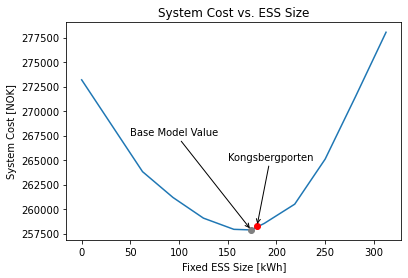

In [16]:
arrowprops = dict(arrowstyle = "->")

costs = sclrs1['Actual System Cost']
x = sclrs1['var_ESS_size']

a = sclrs1['var_ESS_size'].iloc[5]
b = sclrs1['Actual System Cost'].iloc[5]
bb = b+400

plt.plot(x,costs)
plt.plot(a,b, 'o', color = 'gray')
plt.plot(180,bb,'o', color = 'r')
plt.ylabel('System Cost [NOK]')
plt.xlabel('Fixed ESS Size [kWh]')
plt.annotate('Base Model Value', xy = (a,b), arrowprops = arrowprops, xytext = (50,267500))
plt.annotate('Kongsbergporten', xy = (180, bb), arrowprops = arrowprops, xytext = (150, 265000))
plt.title('System Cost vs. ESS Size')


This proves that having an ESS is actually cost-saving. This is a represenation of 4 months, and zero battery is 9.14% more costly than the "optimal" ESS size which is at 187.5 kWh. Over time, this difference is believed to be greater. The annuitised investment cost of the 187.5 kWh battery is less than the difference in electricity and grid tariff costs. In other words, the operator saves more money on their electricity bill than they have used on the battery system. Without a battery the electricity bill for these four months is 269591 NOK. With 187.5 kWh it is 208866 NOK, a difference of 60725 NOK. Investment cost of battery accounts for 33000 for four months, nearly half of money saved on electricity. 

Also, this graph shows that it may not be beneficial to install a battery at any size. If the ESS is either very small or very large the system becomes more expensive. This is a fundamental finding for this thesis. Luckily, the system at Kongsbergporten is near the "optimal" battery size.

In [34]:
p = ESS_p['150']

In [35]:
dis = []

for i in range(len(p)):
    if p[i] > 0 and p[i+1] < 0:
        dis.append(i)
    else:
        pass

In [36]:
c = len(dis)

print('At optimal battery size, the battery is cycled ' + str(c) + ' times, accounting for ' + str(c*3) + ' times in a year. This gives the battery a lifetime of ' + str(6000/(c*3)) + ' years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten')

At optimal battery size, the battery is cycled 384 times, accounting for 1152 times in a year. This gives the battery a lifetime of 5.208333333333333 years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten


In [37]:
p = ESS_p['75']

dis = []

for i in range(len(p)):
    if p[i] > 0 and p[i+1] < 0:
        dis.append(i)
    else:
        pass
    
c = len(dis)

print('At half of optimal battery size, the battery is cycled ' + str(c) + ' times, accounting for ' + str(c*3) + ' times in a year. This gives the battery a lifetime of ' + str(6000/(c*3)) + ' years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten')

At half of optimal battery size, the battery is cycled 380 times, accounting for 1140 times in a year. This gives the battery a lifetime of 5.2631578947368425 years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten


In [45]:
p = ESS_p['139.17']

dis = []

for i in range(len(p)):
    if p[i] > 0 and p[i+1] < 0:
        dis.append(i)
    else:
        pass
    
c = len(dis)

print('At large battery size, the battery is cycled ' + str(c) + ' times, accounting for ' + str(c*3) + ' times in a year. This gives the battery a lifetime of ' + str(6000/(c*3)) + ' years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten')

At large battery size, the battery is cycled 378 times, accounting for 1134 times in a year. This gives the battery a lifetime of 5.291005291005291 years. However, the battery is never overcharged or overdischarged, so the 6000 cyclelife can assumably be higher for Kongsbergporten


In [39]:
sclrs1['var_ESS_size'].iloc[1:]

50.00      62.5000
75.00      93.7500
100.00    125.0000
125.00    156.2500
139.17    173.9625
150.00    187.5000
175.00    218.7500
200.00    250.0000
225.00    281.2500
250.00    312.5000
Name: var_ESS_size, dtype: float64

Text(0.5, 1.0, 'Battery Cycles vs. Battery Size')

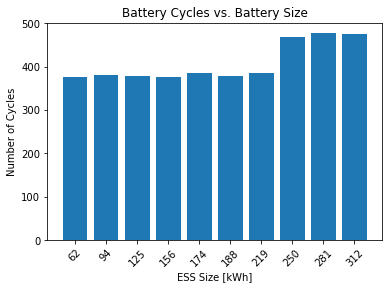

In [62]:
cycles = [377,380,378,377,384,378,386,469,477,476]
size = sclrs1['var_ESS_size'].iloc[1:]
size = [round(size) for size in size]
sizes = [str(size) for size in size]
#sizes[4] = str(173.9)

plt.xticks(rotation = 45)
plt.xlabel('ESS Size [kWh]')
plt.ylabel('Number of Cycles')
plt.bar(sizes,cycles)
plt.title('Battery Cycles vs. Battery Size')


In [51]:
sizes

'50.00      62.5000\n75.00      93.7500\n100.00    125.0000\n125.00    156.2500\n139.17    173.9625\n150.00    187.5000\n175.00    218.7500\n200.00    250.0000\n225.00    281.2500\n250.00    312.5000\nName: var_ESS_size, dtype: float64'

Something happens at 250 kWh battery size. the battery is cycled 100 times more over the 4 months. Im not 100% sure why, but i think it has to do with the max power, affecting the power tariff. The model "decides" the monthly max power, and with larger battery this value can be lower. Can it be that the battery kicks in before the grid limit at 180? Maxpower is below 180 in three of four months for these cases. I think the model runs the battery as much as possible to lower electricity costs, especially when electricity costs are varying.

So in essence, increasing the battery size is not only more expensive, but also may shorten the battery lifetime. Of course, the battery is able to supply higher capacity for longer even with degradation when the battery is bigger. It would be interesting to see something in future work where battery degradation is taken into account. Maybe this can be put into my model, or have multiple models. 

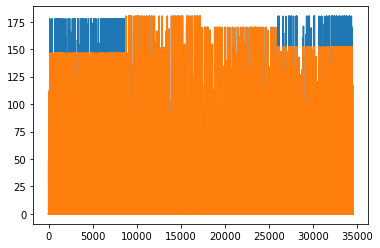

In [40]:
plt.plot(grid_p['175'])
plt.plot(grid_p['200'])



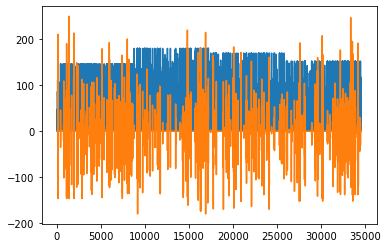

In [41]:
plt.plot(grid_p['200'])
plt.plot(ESS_p['200'])

In [78]:
ess_mean = []
ESS = ESS_p.copy()
ESS = ESS.drop(columns = ['0'])


for i in range(len(ESS)):
    ess_mean.append(sum(ESS.iloc[i])/len(ESS.iloc[i]))


(array([18932., 18946., 18962., 18976., 18993., 19007., 19024., 19038.,
        19052.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

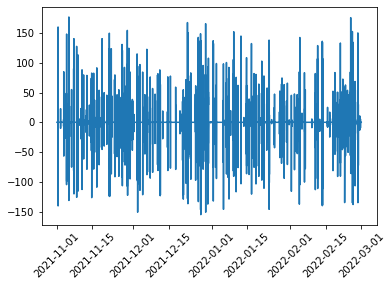

In [84]:
demand = pd.read_csv('demand_analysis.tsv', sep = ',')
demand['All'] = demand['C1'] + demand['C2'] + demand['C3'] + demand['C4'] + demand['C5'] + demand['C6'] + demand['C7'] + demand['C8']
df = pd.DataFrame()
df['DateTime'] = pd.to_datetime(demand['DateTime'])


plt.plot(df['DateTime'], ess_mean)
plt.xticks(rotation = 45)
plt.ylabel('ESS Power [kW]')


,100,125,139.17,150,175,200,225,250,50,75
0,-7.389644e-12,-1.728040e-11,4.047251e-11,0.0,-1.159606e-11,-1.955414e-11,-3.274181e-11,-3.228706e-11,-1.477929e-12,1.193712e-11
1,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
34537,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
34538,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
34539,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
34540,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
